# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment


Problem statemnt was authed by using 5W1H method

What is the problem that needs to be solved?
- Reducing accidents, casualties on the roads and limiting it.

Why is it a problem?
- By looking to consequences of traffic accidents, we find them a painful and costly whether in the human side or economic. What If we save life of many people and prevent more happend accidents? how will be our economic?

Where is the problem observed?
- The problem is observed on the roads of vhicles

Who is impacted? (Human - Economy)
- This problem reaps lives and raises economic expenses through treating casualties and buying medicines as well as vehicles damages and facilities.

When was the problem first observed?
- This problem began when vehicles invented and people started owned its and used them as transfportation manner. Until now it stil as phenomenon does not disappear however we can limit it by implement new rules and fines.

How is the problem observed? (symptoms) 
- Accidents occur as daily basis and result casualties, deaths and other damages in vehicles and facilities

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

In general, traffic accidents are common problem in the world. My country Saudi Arabia still suffering from it, but in the last five years the General Department of Traffic imposed new traffic rules and fines were implemented in October 2016. They limited somewhat of occuring accidents and results casualties and deaths. All regions were accidetns average total dropped except Makkah in 2017 in addition to there was raising in driving licenses issued specifically in 2016 and 2017 and that return population growth. There were some shortage in the features of dataset [Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period) which did not enable us to find the percent of accidents total, casualities and deaths in all years from 1993 - 2015.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)

**features**

_Unnamed_: refers to unique id of each row

_Year_: refers to year of accidents occure { 2016 - 2017 }

_Region_: refers to name of region

_Indicator_: refers to casualties { No. of Casualties - Injured, No. of Casualties - Dead, No. of Accidents }

_Value_: refers to number of casualties yearly

_geo_point_2d_: refers to region coordinate Latitude and Longitude 

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)

**features**

_Unnamed_: refers to unique id of each row

_Year_: refers to year of accidents occure { 1990 - 2017 }

_Administritive Area_: refers to name of region

_Driving Liceses_: refers to number of driving licnesnes per year

_geo_point_2d_: refers to region coordinate Latitude and Longitude


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code

# traffic accidents data frame
ta_df = pd.read_csv('saudi-arabia-traffic-accidents-2008.csv', delimiter=';', )

# driving licenses data frame
dl_df = pd.read_csv('saudi-arabia-driving-licenses-2004-2008.csv', delimiter= ';',)

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code
# the first 10 rows of traffic accidents
ta_df.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [4]:
print(ta_df.shape)

(84, 7)


In [5]:
# the first 10 rows of driving licenses
dl_df.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [6]:
dl_df.shape

(350, 5)

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
- There are more than id columns in each dataframe
  ta_df = [Unnamed: 0, Unnamed: 0.1], dl_df = [Unnamed: 0]
- There are similar columns with some different values. 
  ta_df = [Year, Region ], dl_df = [Year, Adminsitritive Area]
- There are same column with same values.
  ta_df = [geo_point_2d], dl_df = [geo_point_2d]
- There are different columns with different values.
  ta_df = [Value], dl_df = [Driving Liceses]
- There are numeric columns with characters.
  ta_df = [Year, Value], dl_df = [Year, Driving Liceses]
- We can modify the column's names with appropriate names

#### 4a. How complete is the data?

Investigate missing values etc.

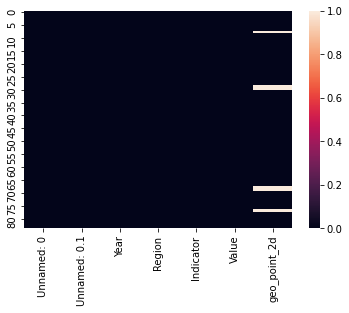

In [7]:
#Code
# create heatmap to show missing values at traffic accidents dataframe
sns.heatmap(ta_df.isna());

In [8]:
# determine all rows that contines missing values 
ta_missing_vals = ta_df[ta_df['geo_point_2d'].isna()]
ta_missing_vals

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
29,29,29,(2016),Total,No. of Accidents,533380n,NaN
30,30,30,(2016),Total,No. of Casualties - Injured,38120n,NaN
68,68,68,(2017),Total,No. of Accidents,460488n,NaN
69,69,69,(2017),Total,No. of Casualties - Injured,33199n,NaN
77,77,77,(2016),Total,No. of Casualties - Dead,9031n,NaN


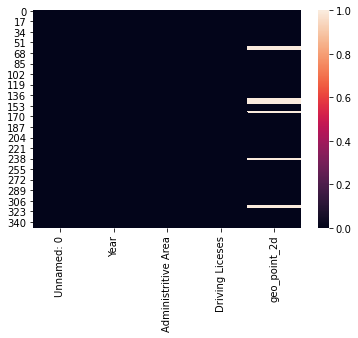

In [9]:
# create heatmap to show messing values at driving lecinces data frame
sns.heatmap(dl_df.isna());

In [10]:
# determine all rows that contines messing values 
dl_missing_vals = dl_df[dl_df['geo_point_2d'].isna()]
dl_missing_vals

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
58,58,(2015),Total,435439n,NaN
59,59,(2017),Total,928165n,NaN
60,60,(1993),Total,294893n,NaN
61,61,(1994),Total,303520n,NaN
62,62,(2003),Total,254858n,NaN
63,63,(2006),Total,267508n,NaN
142,142,(2014),Total,625414n,NaN
143,143,(2010),Total,386510n,NaN
144,144,(2012),Total,411204n,NaN
145,145,(1999),Total,332210n,NaN


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

**Minimum value**

In [11]:
#Code
# the minimum value for traffic accidents dataframe
ta_df.min()

Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object

In [12]:
# the minimum value for driving licenses dataframe
dl_df.min()

Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

**Maximum value**

In [13]:
# the maximum value for traffic accidents dataframe
ta_df.max()

Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object

In [14]:
# the maximum value for driving liecenses dataframe
dl_df.max()

Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [15]:
#code
# data types of traffic accidents features  
ta_df.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [16]:
# data types of driving liceneses features
dl_df.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

All missing values appeared in the last column `geo_point_2d` for each dataframe when `ta_df['Region'] and dl_df['Administration Area']` columns with value of `total` 

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

**Clean1:**
 - Removing an redundant columns `ta_df[ Unnamed: 0, Unnamed: 0.1 ]` and `dl_df[Unnamed: 0]`

In [17]:
#code
# Removing 1st and 2nd columns from traffic-accidents dataset because they are similar to index
ta_col = ['Year', 'Region', 'Indicator', 'Value', 'geo_point_2d']

ta_df = ta_df[ta_col]
ta_df.head(2)

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"


In [18]:
# Removing 1st columns from driving licenses dataset because it is similar to index
dl_col = ['Year', 'Administritive Area', 'Driving Liceses', 'geo_point_2d']

dl_df = dl_df[dl_col]
dl_df.head(2)

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"


**Clean2:**
- Converting data types `ta_df['Year', 'Value']` and `dl_df['Year', 'Driving Liceses']` to **int64** data type. 

In [19]:
def converting_data_type(df, cols):
    """ 
    checking specific columns then replace specific characters from each value 
    in that column and modifies a data type to numeric type 'int64'  
    then returns to new dataframe  
    """
    
    for col in cols:
        if col == 'Year':
            df[col] = df[col].apply(lambda s: s.replace('(', '').replace(')', ''))
            df[col] = df[col].astype('int64')
            
        elif (col == 'Value') or (col == 'Driving Liceses'):
            df[col] = df[col].apply(lambda s: s.replace('n', ''))
            df[col] = df[col].astype('int64')
    return df

ta_df = converting_data_type(ta_df, ta_df.columns)
dl_df = converting_data_type(dl_df, dl_df.columns)

In [20]:
# check the first two rows in ta_df dataframe
ta_df.head(2)

,Year,Region,Indicator,Value,geo_point_2d
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334"
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439"


In [21]:
# check the first two rows in dl_df dataframe
dl_df.head(2)

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,2012,Makkah,143954,"21.628962766, 41.2636898334"
1,1994,Makkah,75349,"21.628962766, 41.2636898334"


In [22]:
# check data types of all columns in ta_df dataframe
ta_df.dtypes

Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object

In [23]:
# check data types of all columns in dl_df dataframe
dl_df.dtypes

Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
dtype: object

**Clean3:**

- Make new columns `x` and `y` using `geo_point_2d`

In [24]:
#code
def seperate_column(df, col):
    
    df['geo_point_2d'] = df['geo_point_2d'].replace({np.nan: 'np.nan, np.nan'})
    df['geo_point_2d'] = df['geo_point_2d'].apply(lambda s: tuple(s.split(',')))
    x, y = [], []
    for i in range(len(df['geo_point_2d'])):
        try:
            x.append(float(df['geo_point_2d'][i][0]))
            y.append(float(df['geo_point_2d'][i][1]))
        except:
            x.append(np.nan)
            y.append(np.nan)
    df['x'], df['y'] = pd.Series(x), pd.Series(y)
    df.drop(columns='geo_point_2d', inplace=True)
    return df

ta_df = seperate_column(ta_df, 'geo_point_2d')
dl_df = seperate_column(dl_df, 'geo_point_2d')

In [28]:
# check the first two rows of traffic accidents dataframe
ta_df.head(2)

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.26369
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.14783


In [29]:
# check the first two rows of driving leceineces dataframe
dl_df.head(2)

,Year,Administritive Area,Driving Liceses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369


**Clean3:**

- Fix any individual values preventing other columns from being the appropriate type.

Let us see the two column `ta_df['Region']` and `dl_df['Admistritive_Area']`, they refer to group of cities some of them the same name and others with different name. The figure below illustrates the common and uncommon values for each one.

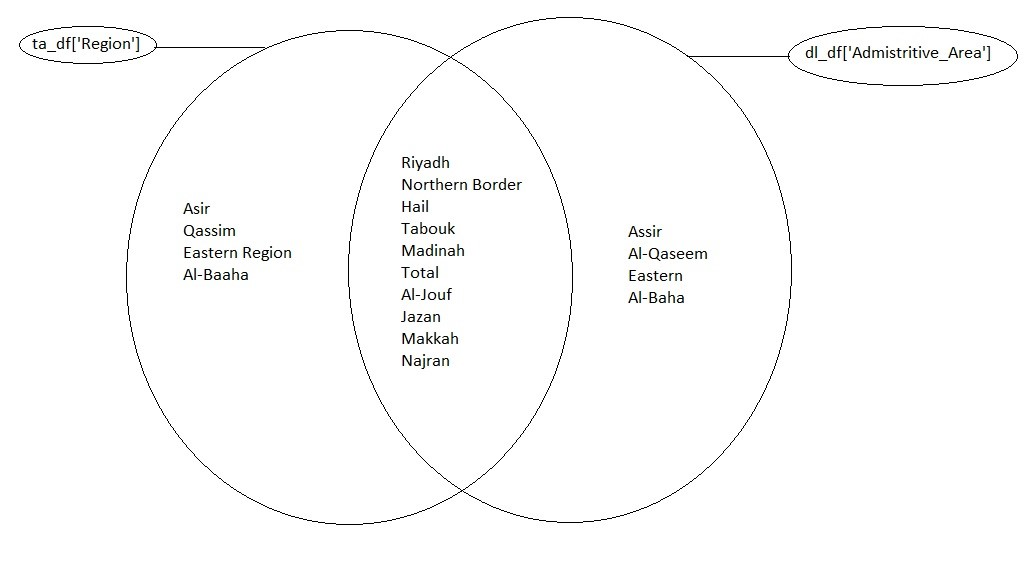

In [30]:
#code
# all regions in traffic accidents dataframe
region_set = set(ta_df['Region'].unique().tolist())

# all regions in driving leciences dataframe
adminstritive_area_set = set(dl_df['Administritive Area'].unique().tolist())

# all common regions between two dataframes
common_region = region_set.intersection(adminstritive_area_set)

print(f'{len(common_region)} common regions between traffic accidents and driving liceneces dataframes:\
    \n{common_region}')

10 common regions between traffic accidents and driving liceneces dataframes:    
{'Northern Boarder', 'Jazan', 'Makkah', 'Total', 'Najran', 'Hail', 'Al-Jouf', 'Madinah', 'Riyadh', 'Tabouk'}


In [31]:
# all regions in traffic accidents dataframe but not in driving liceses dataframe
different_region = region_set.difference(adminstritive_area_set)

print(f'{len(different_region)} regions in traffic accidents with different spelling or name: \
   \n {different_region} \n')

print(f'{len(different_region)} regions in driving leciences with different spelling or name: \
   \n {adminstritive_area_set.difference(region_set)}')

4 regions in traffic accidents with different spelling or name:    
 {'Asir', 'Al-Baaha', 'Qassim', 'Eastern Region'} 

4 regions in driving leciences with different spelling or name:    
 {'Al-Qaseem', 'Assir', 'Eastern', 'Al-Baha'}


In [32]:
ta_df['Region'] = ta_df['Region'].replace({
                        'Asir': 'Assir',
                        'Qassim': 'Al-Qaseem',
                        'Al-Baaha': 'Al-Baha'},)

dl_df['Administritive Area'] = dl_df['Administritive Area'].replace({
                                    'Eastern': 'Eastern Region'})

region_set = set(ta_df['Region'].unique().tolist())

adminstritive_area_set = set(dl_df['Administritive Area'].unique().tolist())

common_region_updated = region_set.intersection(adminstritive_area_set)

print(f'{len(common_region_updated)} common regions between traffic accidents and driving liceneces dataframes:\
    \n{common_region_updated}')


14 common regions between traffic accidents and driving liceneces dataframes:    
{'Northern Boarder', 'Jazan', 'Makkah', 'Assir', 'Al-Baha', 'Total', 'Najran', 'Hail', 'Eastern Region', 'Al-Jouf', 'Al-Qaseem', 'Riyadh', 'Madinah', 'Tabouk'}


In [33]:
x_ta_set, y_ta_set= set(ta_df['x'].unique().tolist()), set(ta_df['y'].unique().tolist())
x_dl_set, y_dl_set= set(dl_df['x'].unique().tolist()), set(dl_df['y'].unique().tolist())

common_x_set = x_ta_set.intersection(x_dl_set)
common_y_set = y_ta_set.intersection(y_dl_set)


print(f'{len(common_x_set)} common values between traffic accidents and driving liceneces dataframes:\
    \n{common_x_set}')
print(f'\n{len(common_y_set)} common values between traffic accidents and driving liceneces dataframes:\
    \n{common_y_set}')

13 common values between traffic accidents and driving liceneces dataframes:    
{27.90165499, 17.2072313962, 18.4511003068, 19.1387847401, 20.1484058503, 21.628962766, 23.2883307307, 23.0814341634, 24.927534539, 26.1967063704, 27.400845724, 29.9677445762, 30.197074783}

13 common values between traffic accidents and driving liceneces dataframes:    
{37.2598581394, 39.5570371172, 39.4918237173, 41.2636898334, 42.941470036, 43.3429998455, 41.4406960508, 41.8171186952, 42.6525807422, 46.8688495726, 41.4665484892, 45.5857512766, 50.1478302439}


In [34]:
ta_df['Indicator'].replace({
    'No. of Casualties - Injured':'injures_total',
    'No. of Casualties - Dead': 'deaths_total',
    'No. of Accidents': 'accidents_total'}, inplace=True)

We renamed all values of region column in each dataframe 

- Finish your data modifications by making sure the columns are now typed appropriately.

In [35]:
#Code:
# check the first two rows of traffic accidents dataframe
ta_df.head(2)

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,injures_total,12383,21.628963,41.26369
1,2016,Eastern Region,deaths_total,1113,23.288331,50.14783


In [36]:
#Code:
# check the first two rows of driving accidents dataframe
dl_df.head(2)

,Year,Administritive Area,Driving Liceses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369


- Display the data types again to confirm they are correct.

In [37]:
#Code:
# check data types of traffic accidents dataframe
ta_df.dtypes

Year           int64
Region        object
Indicator     object
Value          int64
x            float64
y            float64
dtype: object

In [38]:
# check data types of driving liceses dataframe
dl_df.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
x                      float64
y                      float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [39]:
#code
ta_df.rename(columns={
    'Year': 'year',
    'Region': 'region',
    'Indicator': 'casualty_status',
    'Value': 'casualties_total',
    'x': 'x',
    'y': 'y'}, inplace=True)

# rename driving liceses columns
dl_df.rename(columns={
    'Year': 'year',              
    'Administritive Area':'region',    
    'Driving Liceses': 'driving_license_total',        
    'x': 'x',                      
    'y': 'y'}, inplace=True)


In [40]:
# check the first two rows of traffic accidents dataframe
ta_df.head(2)

,year,region,casualty_status,casualties_total,x,y
0,2016,Makkah,injures_total,12383,21.628963,41.26369
1,2016,Eastern Region,deaths_total,1113,23.288331,50.14783


In [41]:
# check the first two row of driving liceses dataframe
dl_df.head(2)

,year,region,driving_license_total,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Traffic_Accidents|Accident occuring year|
|region|object|Traffic_Accidents|Accident occuring region|
|casualty_status|object|Traffic_Accidents|casualties_status {Casualties - Injured, Casualties - Dead, Accidents }|
|casualties_total|int|Traffic_Accidents|casualties total per year|
|x|float|Traffic_Accidents|Latitude of region coordinate|
|y|float|Traffic_Accidents|Longitude of region coordinate|
|year|int|Driving_Licenses|Driving License issuance year|
|region|object|Driving_Licenses|Driving License issuance region|
|driving_license_total|int|Driving_Licenses|Driving licenses issuance total per year|
|x|float|Driving_Licenses|Latitude of region coordinate|
|y|float|Driving_Licenses|Longitude of region coordinate|




#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:

0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [42]:
#code
# Total is not associated with regions in all dataframes
# so we should remove all rows with total values 

def remove_total(df, col):
    """
    refers to new dataframe without missing values 
    as well as with unassociated vlaues with regions
    """
    
    df.dropna(axis=0, inplace=True)
    return df

ta_df = remove_total(ta_df, 'region')
dl_df = remove_total(dl_df, 'region')

In [43]:
# check the shape of all dataframes
ta_df.shape

(78, 6)

In [44]:
dl_df.shape

(325, 5)

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

License data `dl_df` and Accident data `ta_df` are in long format because in each of them there are **13 regions** for each year as well as there are **3 casualties status** for each region in Accident data. 

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [45]:
#code
# first change ta_df dataframe to wide format

ta_df_wf = ta_df.pivot_table('casualties_total', ['year', 'region', 'x', 'y'], 'casualty_status')
ta_df_wf

casualty_status                            accidents_total  deaths_total  \
year region           x         y                                          
2016 Al-Baha          20.148406 41.466548             3618           185   
     Al-Jouf          29.967745 39.557037            10212           245   
     Al-Qaseem        26.196706 43.343000            25664           397   
     Assir            19.138785 42.941470            32684           983   
     Eastern Region   23.288331 50.147830           101619          1113   
     Hail             27.400846 41.440696            10199           299   
     Jazan            17.207231 42.652581            25873           514   
     Madinah          24.927535 39.491824            14475           822   
     Makkah           21.628963 41.263690           134838          2243   
     Najran           18.451100 46.868850             3235           173   
     Northern Boarder 30.197075 41.817119            13196           193   
     Riyadh           23.081434 45.585751           141736          1430   
     Tabouk           27.901655 37.259858            16031           434   
2017 Al-Baha          20.148406 41.466548             1414           134   
     Al-Jouf          29.967745 39.557037            10469           240   
     Al-Qaseem        26.196706 43.343000            22405           319   
     Assir            19.138785 42.941470            25245           828   
     Eastern Region   23.288331 50.147830            81433           963   
     Hail             27.400846 41.440696             9379           265   
     Jazan            17.207231 42.652581            22161           466   
     Madinah          24.927535 39.491824            16070           580   
     Makkah           21.628963 41.263690           145541          1641   
     Najran           18.451100 46.868850             3193           194   
     Northern Boarder 30.197075 41.817119            11540           112   
     Riyadh           23.081434 45.585751            99925          1399   
     Tabouk           27.901655 37.259858            11713           348   

casualty_status                            injures_total  
year region           x         y                         
2016 Al-Baha          20.148406 41.466548           1227  
     Al-Jouf          29.967745 39.557037            920  
     Al-Qaseem        26.196706 43.343000           1513  
     Assir            19.138785 42.941470           2541  
     Eastern Region   23.288331 50.147830           4893  
     Hail             27.400846 41.440696            932  
     Jazan            17.207231 42.652581           2259  
     Madinah          24.927535 39.491824           4184  
     Makkah           21.628963 41.263690          12383  
     Najran           18.451100 46.868850            706  
     Northern Boarder 30.197075 41.817119            631  
     Riyadh           23.081434 45.585751           4207  
     Tabouk           27.901655 37.259858           1724  
2017 Al-Baha          20.148406 41.466548           1007  
     Al-Jouf          29.967745 39.557037            862  
     Al-Qaseem        26.196706 43.343000           1446  
     Assir            19.138785 42.941470           2368  
     Eastern Region   23.288331 50.147830           4073  
     Hail             27.400846 41.440696            773  
     Jazan            17.207231 42.652581           2207  
     Madinah          24.927535 39.491824           2917  
     Makkah           21.628963 41.263690          10623  
     Najran           18.451100 46.868850            766  
     Northern Boarder 30.197075 41.817119            374  
     Riyadh           23.081434 45.585751           4540  
     Tabouk           27.901655 37.259858           1243

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [48]:
#code
# join dataframe on year and region columns with inner join 
# and get new dataframe with all columns of ta_df and one extra column of dl_df 'driving_license_total'
# We get new dataframe with new column driving_license_total but with missing more years 1993 - 2015 in Driving Licenses

ta_dl_df = pd.merge(dl_df, ta_df_wf, how='inner', on=['year','region'])
ta_dl_df

,year,region,driving_license_total,x,y,accidents_total,deaths_total,injures_total
0,2017,Hail,22035,27.400846,41.440696,9379,265,773
1,2017,Northern Boarder,5280,30.197075,41.817119,11540,112,374
2,2016,Al-Baha,4614,20.148406,41.466548,3618,185,1227
3,2017,Al-Qaseem,6318,26.196706,43.343000,22405,319,1446
4,2017,Eastern Region,126816,23.288331,50.147830,81433,963,4073
5,2017,Tabouk,10232,27.901655,37.259858,11713,348,1243
6,2016,Northern Boarder,4958,30.197075,41.817119,13196,193,631
7,2016,Najran,2153,18.451100,46.868850,3235,173,706
8,2017,Makkah,142487,21.628963,41.263690,145541,1641,10623
9,2016,Makkah,136055,21.628963,41.263690,134838,2243,12383


In [55]:
# join dataframe on year and region columns with outer join 
# and get new dataframe with all columns of ta_df and one extra column of dl_df 'driving_license_total'
# with missing values in accident_total , deaths_total and injures_total because 
# there are non values in years columns from 1993 to 2017 in Driving liceneses dataframe
# but we get all years

ta_dl_df1 = pd.merge(dl_df, ta_df_wf, how='outer', on=['year','region'])
ta_dl_df1.head()

,year,region,driving_license_total,x,y,accidents_total,deaths_total,injures_total
0,2012,Makkah,143954,21.628963,41.26369,NaN,NaN,NaN
1,1994,Makkah,75349,21.628963,41.26369,NaN,NaN,NaN
2,1998,Makkah,86082,21.628963,41.26369,NaN,NaN,NaN
3,2004,Makkah,86636,21.628963,41.26369,NaN,NaN,NaN
4,2005,Makkah,65099,21.628963,41.26369,NaN,NaN,NaN


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [47]:
#code
# we will save second dataframe ta_dl_df1
pd.DataFrame.to_csv(ta_dl_df1,'new_data/combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [49]:
lst_cols_ta = [['year', 'casualties_total', 'x', 'y'], ['year', 'driving_license_total', 'x', 'y']]
df = ta_df, dl_df
sd = { }

def standard_deviation(df, col):
    # Number of observations
    n = df.shape[0]
    # Mean of the data
    mean = sum(df[col])/n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in df[col]]
    # Variance
    variance = sum(deviations) / n
    return variance ** (1/2)


for i in range(len(lst_cols_ta)): 
    for col in lst_cols_ta[i]:
        std = standard_deviation(df[i], col)
        if (i == 0) & ((col == 'year') | (col == 'x') | (col == 'y')):
            sd.update({'Traffic_Accidents_'+col:std})
        elif (i == 1) & ((col == 'year') | (col == 'x') | (col == 'y')):
            sd.update({'Driving_Licenses_'+col:std})
        else:
            if (i==0) & (col=='casualties_total'):
                sd.update({'Traffic_Accidents_'+col:std})
            else:
                sd.update({'Driving_Licenses_'+col:std})

**Traffic Accident Dataframe `ta_df`**

In [50]:
ta_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,78.0,2016.500000,0.503236,2016.000000,2016.000000,2016.500000,2017.000000,2017.000000
casualties_total,78.0,13868.038462,31716.885363,112.000000,721.000000,1682.500000,10584.500000,145541.000000
x,78.0,23.810447,4.218654,17.207231,20.148406,23.288331,27.400846,30.197075
y,78.0,42.602789,3.270216,37.259858,41.263690,41.817119,43.343000,50.147830


**Driving Licenses Dataframe `dl_df`**

In [51]:
dl_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,325.0,2005.000000,7.222222,1993.000000,1999.000000,2005.000000,2011.000000,2017.000000
driving_license_total,325.0,28915.347692,47419.058819,915.000000,4846.000000,10267.000000,25423.000000,495307.000000
x,325.0,23.810447,4.197987,17.207231,20.148406,23.288331,27.400846,30.197075
y,325.0,42.602789,3.254196,37.259858,41.263690,41.817119,43.343000,50.147830


**After applying function of `standard_deviation` for all numeric columns of `ta_df` and `dl_df`**

In [52]:
sd

{'Traffic_Accidents_year': 0.5,
 'Traffic_Accidents_casualties_total': 31512.916138463017,
 'Traffic_Accidents_x': 4.191524025811862,
 'Traffic_Accidents_y': 3.249185305131691,
 'Driving_Licenses_year': 7.211102550927978,
 'Driving_Licenses_driving_license_total': 47346.0502174464,
 'Driving_Licenses_x': 4.1915240258118605,
 'Driving_Licenses_y': 3.24918530513169}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: Yes, it matched up with the output from pandas `describe`.

**numpy standard deviation for all numeric columns of `ta_df` and `dl_df`**

In [53]:
#Code:
print(f'Traffic Accidents:\n {np.std(ta_df)} \n')
print(f'Driving Liceses:\n {np.std(dl_df)}')

Traffic Accidents:
 year                    0.500000
casualties_total    31512.916138
x                       4.191524
y                       3.249185
dtype: float64 

Driving Liceses:
 year                         7.211103
driving_license_total    47346.050217
x                            4.191524
y                            3.249185
dtype: float64


Answer: Also numpy `std` matched up the outpot of function and from pandas `describe`

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)**

The target columns is `driving_license_total`

In [56]:
#code
# the highest Driving Licenses based on years (1993 - 2017)
ta_dl_df1.sort_values(by='driving_license_total', ascending=False).head()

,year,region,driving_license_total,x,y,accidents_total,deaths_total,injures_total
271,2017,Riyadh,495307,23.081434,45.585751,99925.0,1399.0,4540.0
272,2016,Riyadh,242851,23.081434,45.585751,141736.0,1430.0,4207.0
140,2014,Riyadh,194208,23.081434,45.585751,NaN,NaN,NaN
59,2013,Riyadh,165994,23.081434,45.585751,NaN,NaN,NaN
62,2015,Makkah,157389,21.628963,41.263690,NaN,NaN,NaN


In [58]:
# the lowest Driving Licenses based on years (1993 - 2017)
ta_dl_df1.sort_values(by='driving_license_total').head()

,year,region,driving_license_total,x,y,accidents_total,deaths_total,injures_total
191,2015,Tabouk,915,27.901655,37.259858,NaN,NaN,NaN
161,2007,Al-Baha,997,20.148406,41.466548,NaN,NaN,NaN
259,1995,Northern Boarder,1318,30.197075,41.817119,NaN,NaN,NaN
148,1996,Northern Boarder,1383,30.197075,41.817119,NaN,NaN,NaN
260,1994,Northern Boarder,1457,30.197075,41.817119,NaN,NaN,NaN


**Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)**

The target column is `accidents_total`

In [59]:
# the highest mean of Traffic Accidents numbers for years (2016 - 2017)
ta_dl_df1.sort_values(by='accidents_total', ascending=False).head()

,year,region,driving_license_total,x,y,accidents_total,deaths_total,injures_total
142,2017,Makkah,142487,21.628963,41.263690,145541.0,1641.0,10623.0
272,2016,Riyadh,242851,23.081434,45.585751,141736.0,1430.0,4207.0
143,2016,Makkah,136055,21.628963,41.263690,134838.0,2243.0,12383.0
235,2016,Eastern Region,142307,23.288331,50.147830,101619.0,1113.0,4893.0
271,2017,Riyadh,495307,23.081434,45.585751,99925.0,1399.0,4540.0


In [60]:
# the lowest mean of Traffic Accidents numbers for years (2016 - 2017)
ta_dl_df1.sort_values(by='accidents_total').head()

,year,region,driving_license_total,x,y,accidents_total,deaths_total,injures_total
285,2017,Al-Baha,4131,20.148406,41.466548,1414.0,134.0,1007.0
206,2017,Najran,13825,18.451100,46.868850,3193.0,194.0,766.0
119,2016,Najran,2153,18.451100,46.868850,3235.0,173.0,706.0
50,2016,Al-Baha,4614,20.148406,41.466548,3618.0,185.0,1227.0
27,2017,Hail,22035,27.400846,41.440696,9379.0,265.0,773.0


**What are the regions that have more Driving Licenses issued in each year than the year average?**

The target column is `driving_license_total`

In [61]:
driving_licenses_average = ta_dl_df1['driving_license_total'].mean()
ta_dl_df1[ta_dl_df1['driving_license_total'] > driving_licenses_average].sort_values(by='driving_license_total')

,year,region,driving_license_total,x,y,accidents_total,deaths_total,injures_total
79,2014,Al-Qaseem,29113,26.196706,43.343000,NaN,NaN,NaN
184,2014,Assir,29552,19.138785,42.941470,NaN,NaN,NaN
244,2013,Assir,29730,19.138785,42.941470,NaN,NaN,NaN
220,2010,Riyadh,31378,23.081434,45.585751,NaN,NaN,NaN
6,2014,Madinah,31447,24.927535,39.491824,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
62,2015,Makkah,157389,21.628963,41.263690,NaN,NaN,NaN
59,2013,Riyadh,165994,23.081434,45.585751,NaN,NaN,NaN
140,2014,Riyadh,194208,23.081434,45.585751,NaN,NaN,NaN
272,2016,Riyadh,242851,23.081434,45.585751,141736.0,1430.0,4207.0


In [72]:
driving_licenses_less_than_mean = ta_dl_df1[ta_dl_df1['driving_license_total'] > driving_licenses_average].sort_values(by='driving_license_total')
print(f"There are {driving_licenses_less_than_mean['region'].count()} regions")

There are 77 regions


**What are the regions that have more Traffic Accidents happened in each year than the year average?**

The target column is `accidents_total`

In [73]:
traffic_accidents_average = ta_dl_df1['accidents_total'].mean()
ta_dl_df1[ta_dl_df1['accidents_total'] > traffic_accidents_average].sort_values(by='accidents_total')

,year,region,driving_license_total,x,y,accidents_total,deaths_total,injures_total
88,2017,Eastern Region,126816,23.288331,50.147830,81433.0,963.0,4073.0
271,2017,Riyadh,495307,23.081434,45.585751,99925.0,1399.0,4540.0
235,2016,Eastern Region,142307,23.288331,50.147830,101619.0,1113.0,4893.0
143,2016,Makkah,136055,21.628963,41.263690,134838.0,2243.0,12383.0
272,2016,Riyadh,242851,23.081434,45.585751,141736.0,1430.0,4207.0
142,2017,Makkah,142487,21.628963,41.263690,145541.0,1641.0,10623.0


In [74]:
print(f'There are 3 regions')

There are 3 regions


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

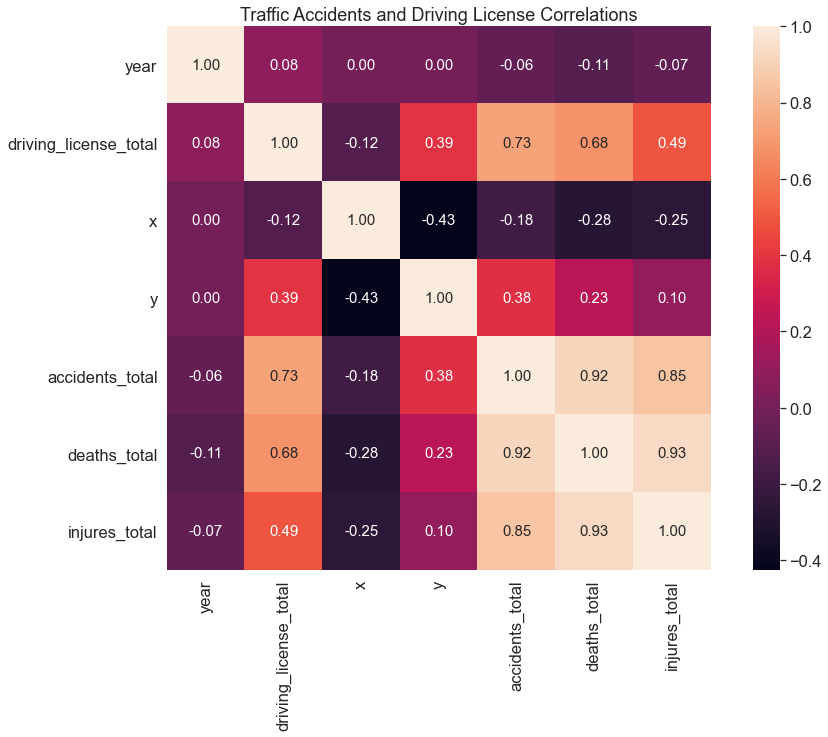

In [75]:
plt.figure(figsize=(15,10))
cm = ta_dl_df.corr()
sns.set(font_scale=1.5)

sns.heatmap(data=cm,
           cbar=True,
           annot=True,
           square=True,
           fmt = '0.2f',
           annot_kws={'size':15},
           )

plt.title('Traffic Accidents and Driving License Correlations')
plt.show()


**Summarize Corrlation **
- There is a highly correlation between `driving_license_total, accidents_total, deathes_total, injures_total` this logical
- There is no correlation between year and other columns because there is missing columns `accidents_total, deathes_total, injures_total` in driving licesnes data

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

In [78]:
# Code
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]); # feel free to add more settings
        ax[i].set_title(lst_titles[i]) # set title name
        ax[i].set_xlabel(lst_xlabels[i]) # set x label name
        ax[i].set_ylabel('Frequent') # set y label name
        ax[i].grid(True)

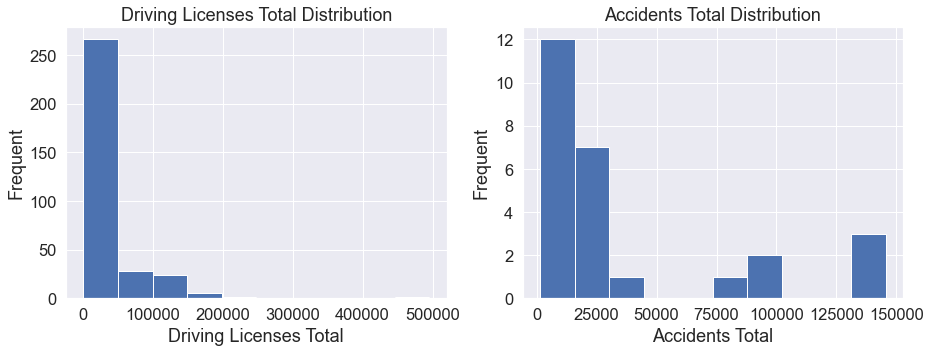

In [79]:
lst_cols = ['driving_license_total', 'accidents_total']
lst_titles = ['Driving Licenses Total Distribution', 'Accidents Total Distribution']
lst_xlabels = ['Driving Licenses Total', 'Accidents Total'] 

subplot_histograms( ta_dl_df1, lst_cols, lst_titles,lst_xlabels)

There are a high lefft skewness in `Driving Licenses Total` and moderate skewness in `Accident Total`.

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [80]:
# Driving Licenses vs. Traffic Accidents for 2017
criteria1 = ta_dl_df1[ta_dl_df1['year'] == 2017][['driving_license_total', 'accidents_total']].reset_index(drop=True)

# Driving Licenses vs. Traffic Accidents for 2016
criteria2 = ta_dl_df1[ta_dl_df1['year'] == 2016][['driving_license_total', 'accidents_total']].reset_index(drop=True)

# Driving Licenses for 2016 vs 2017
criteria3 = pd.concat([
    criteria2['driving_license_total'],
    criteria1['driving_license_total'],
], axis=1)

# Traffic Accidents for 2016 vs 2017
criteria4 = pd.concat([
    criteria2['accidents_total'],
    criteria1['accidents_total'],
], axis=1)

# lists of all criterias dataframe
lst_df = [criteria1, criteria2, criteria3, criteria4]

In [81]:
lst_titles = [
    'Driving Licenses vs Traffic Accidents for 2017',
    'Driving Licenses vs Traffic Accidents for 2016',
    'Driving Licenses for 2016 vs 2017',
    'Traffic Accidents for 2016 vs 2017'
]

lst_xlabels =[
    'Driving Licenses 2017',
    'Driving Licenses 2016',
    'Driving Licenses 2016',
    'Traffic Accidents 2016'
]

lst_ylabels = [
    'Traffic Accidents 2017',
    'Traffic Accidents 2016',
    'Driving Licenses 2017',
    'Traffic Accidents 2017'
]


In [82]:
def subplot_sccater(lst_df, lst_titles, lst_xlabels, lst_ylabels):
    fig, ax = plt.subplots(2,2, figsize=(14,8), constrained_layout=True) # set number of rows and columns of subplots
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i in range(len(lst_df)): # give us index each time to set subplot position
        sns.scatterplot(x=lst_df[i].iloc[:,0], y=lst_df[i].iloc[:,1], ax=ax[i]) # plot sccater with with subplot index
        ax[i].set_title(lst_titles[i], fontsize=16) # set title name for each subplot index
        ax[i].set_xlabel(lst_xlabels[i], fontsize=12) # set x label name for each subplot index
        ax[i].set_ylabel(lst_ylabels[i], fontsize=12) # set y lable name for each subplot index
        

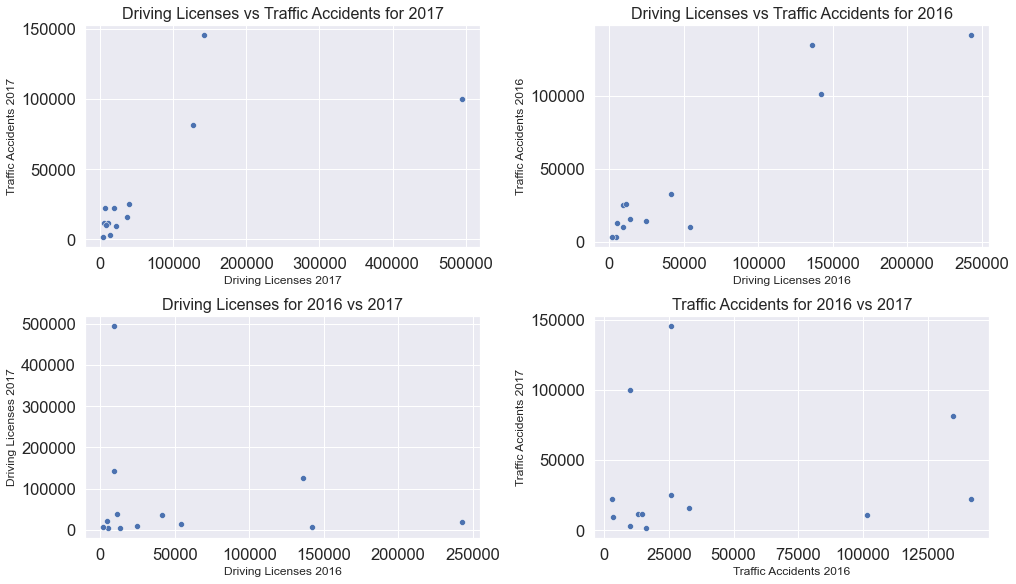

In [83]:
subplot_sccater(lst_df, lst_titles, lst_xlabels, lst_ylabels)

There is not a clear picture give the correlation trend because we need more values. we can say most of values in the the first quarter and dirction slope to Traffic Accident in 2016 and 2017

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [88]:
df = ta_dl_df1[['driving_license_total', 'accidents_total', 'deaths_total', 'injures_total']]

lst_titles = [
    'Distribution of driving license total for different years', 
    'Distribution of accidents total for different years', 
    'Distribution deaths total for different years', 
    'Distribution injures_total for different years'
]

lst_xlabels = [
    ' Driving license total values', 
    ' Accidents total values', 
    ' Deaths total values', 
    ' Injures total values'
]

lst_ylabels = [
    'Driving license total', 
    'Accidents total', 
    'Deaths total', 
    'Injures total'
]

In [89]:
# Code
def subplot_box(dataframe, list_titles, list_xlabels, list_ylabels):
    fig, ax = plt.subplots(2,2, figsize=(12,8), constrained_layout=True) # set number of rows and columns of subplots
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i in range(4): # give us index each time to set subplot position
        sns.boxplot(x=df.iloc[:,i], ax=ax[i]) # plot sccater with with subplot index
        ax[i].set_title(lst_titles[i], fontsize=16) # set title name for each subplot index
        ax[i].set_xlabel(lst_xlabels[i], fontsize=12) # set x label name for each subplot index
        ax[i].set_ylabel(lst_ylabels[i], fontsize=12) # set y lable name for each subplot index

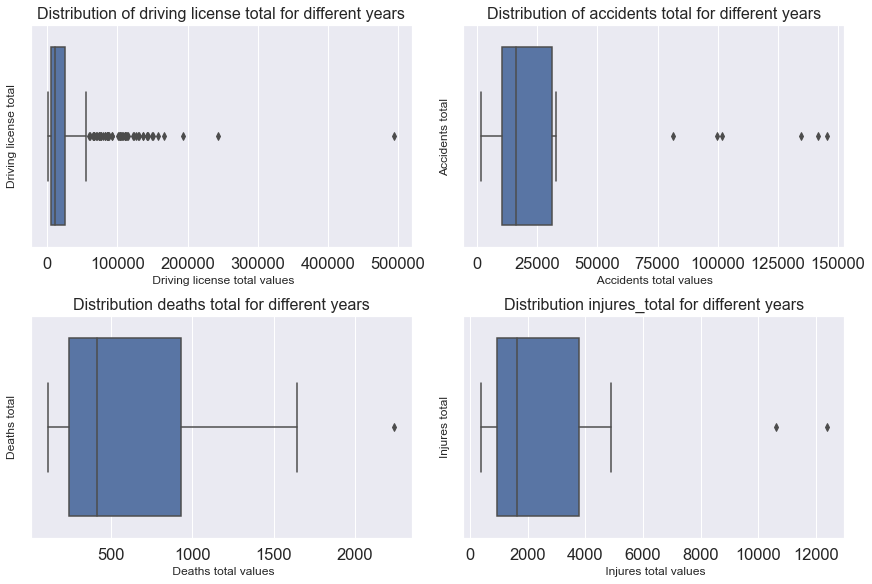

In [90]:
subplot_box(df, lst_titles, lst_xlabels, lst_ylabels)

All figures have outliers but with different rates, and this rate of outliers drop from first grapth `driving_licenses_total` toward last graph `injures_total`

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

The target columns are `region` and `driving_licenses_total`

In [99]:
driving_licenses_total_mean_by_region = ta_dl_df1.groupby(by='region').mean()['driving_license_total']

In [100]:
driving_licenses_total_mean_by_region = driving_licenses_total_mean_by_region.sort_values()

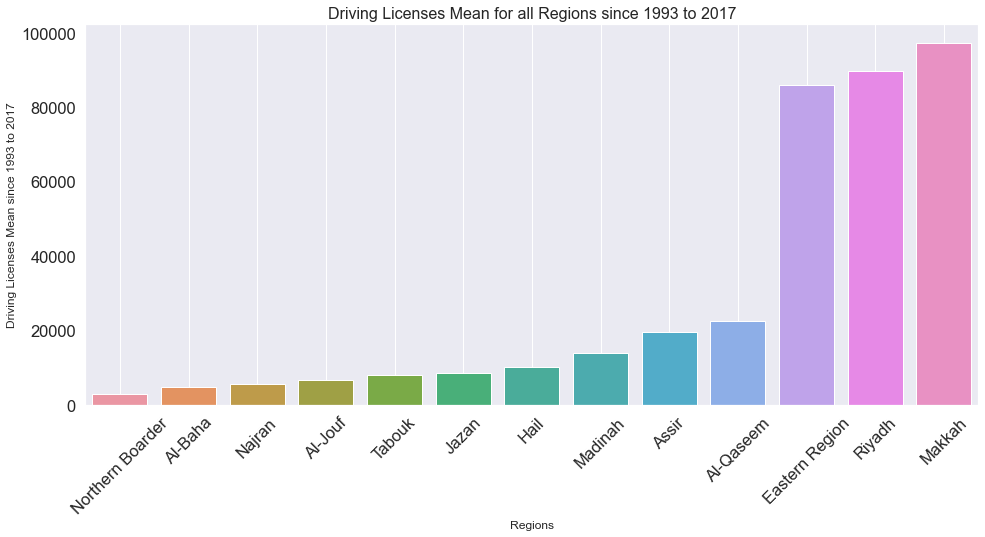

In [101]:
plt.figure(figsize=(16,7))

x = driving_licenses_total_mean_by_region.index
y = driving_licenses_total_mean_by_region.values

sns.barplot(x=x, y=y,)

plt.title('Driving Licenses Mean for all Regions since 1993 to 2017', fontsize=16)
plt.xlabel('Regions', fontsize=12,)
plt.xticks(rotation=45)
plt.ylabel('Driving Licenses Mean since 1993 to 2017', fontsize=12)
plt.grid();

The bar chart illustaes driving licenses total average since 1993 to 2017 for 13 regions. The majorty were at three regions **Makkah, Riyadh and Eastern Region** and this logical because they have most population of Saudi Arabia then came them **Al_Qassem and Assir around 22000 and 20000 liceneses** While other regions were **under 20000 licenses.**

In [210]:
num

['year',
 'driving_license_total',
 'accidents_total',
 'deaths_total',
 'injures_total']

The target columns as x-axis is `region` and y-axis `driving_license_total` in the last two years **2016 and 2017**

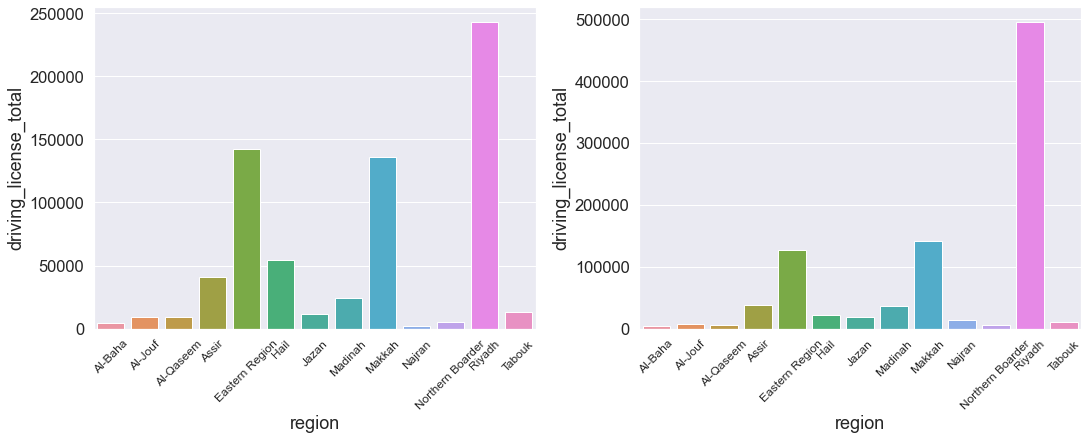

In [211]:
num = [col for col in ta_dl_df.columns if isinstance(ta_dl_df[col][0], np.int64)] # numerical columns
cat = [col for col in ta_dl_df.columns if isinstance(ta_dl_df[col][0], str )] # categorical columns 

fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout=True)

x1 = ta_dl_df[ta_dl_df[num[0]] == 2016][cat[0]].sort_values()
y1 = ta_dl_df[ta_dl_df[num[0]] == 2016][num[1]]

x2 = ta_dl_df[ta_dl_df[num[0]] == 2017][cat[0]].sort_values()
y2 = ta_dl_df[ta_dl_df[num[0]] == 2017][num[1]]

ax[0] = sns.barplot(x=x1, y=y1, data=ta_dl_df, ax=ax[0])
ax[1] = sns.barplot(x=x2, y=y2, data=ta_dl_df, ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,fontsize=12)
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=45,fontsize=12)

plt.show()

Driving licenses total raise double in 2017 and this logical because the population size increase year after year.

--------------------------------

The target columns as x-axis is `region` and y-axis `accidents_total` in the last two years **2016 and 2017**

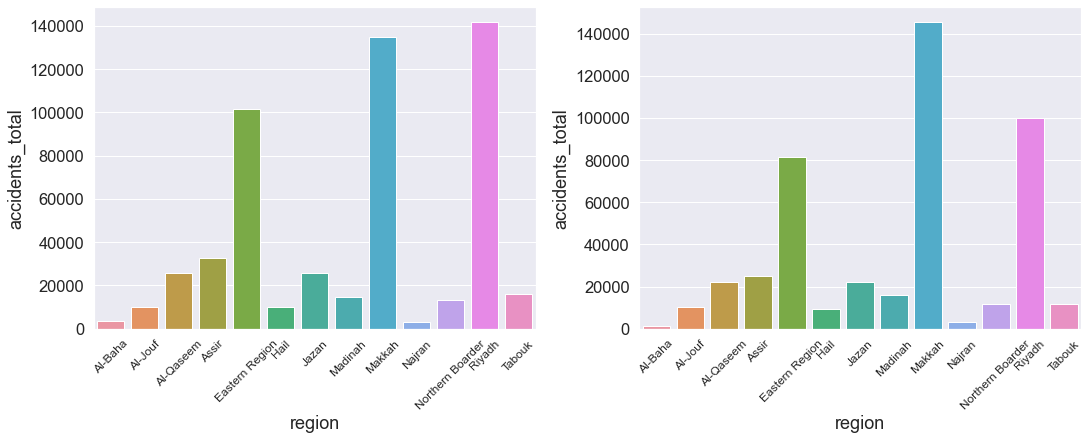

In [207]:
num = [col for col in ta_dl_df.columns if isinstance(ta_dl_df[col][0], np.int64)] # numerical columns
cat = [col for col in ta_dl_df.columns if isinstance(ta_dl_df[col][0], str )] # categorical columns 

fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout=True)

x1 = ta_dl_df[ta_dl_df[num[0]] == 2016][cat[0]].sort_values()
y1 = ta_dl_df[ta_dl_df[num[0]] == 2016][num[2]]

x2 = ta_dl_df[ta_dl_df[num[0]] == 2017][cat[0]].sort_values()
y2 = ta_dl_df[ta_dl_df[num[0]] == 2017][num[2]]

ax[0] = sns.barplot(x=x1, y=y1, data=ta_dl_df, ax=ax[0])
ax[1] = sns.barplot(x=x2, y=y2, data=ta_dl_df, ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,fontsize=12)
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=45,fontsize=12)

plt.show()

Most of accidnts total droped by 25% or less that in 2017 except Makah region raised by 8% at 145000 accidents total.

-----------------------

The target columns as x-axis is `region` and y-axis `deaths_total` in the last two years **2016 and 2017**

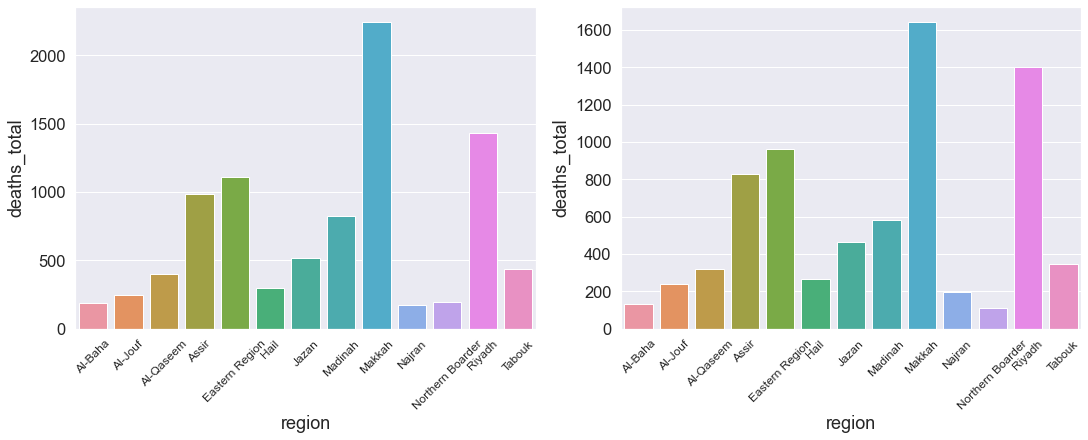

In [208]:
num = [col for col in ta_dl_df.columns if isinstance(ta_dl_df[col][0], np.int64)] # numerical columns
cat = [col for col in ta_dl_df.columns if isinstance(ta_dl_df[col][0], str )] # categorical columns 

fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout=True)

x1 = ta_dl_df[ta_dl_df[num[0]] == 2016][cat[0]].sort_values()
y1 = ta_dl_df[ta_dl_df[num[0]] == 2016][num[3]]

x2 = ta_dl_df[ta_dl_df[num[0]] == 2017][cat[0]].sort_values()
y2 = ta_dl_df[ta_dl_df[num[0]] == 2017][num[3]]

ax[0] = sns.barplot(x=x1, y=y1, data=ta_dl_df, ax=ax[0])
ax[1] = sns.barplot(x=x2, y=y2, data=ta_dl_df, ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,fontsize=12)
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=45,fontsize=12)

plt.show()

Deaths total pecent dropped by 50% or less than that in all regions.

-----------------------------------

The target columns as x-axis is `region` and y-axis `injuries_total` in latest two years **2016 and 2017**

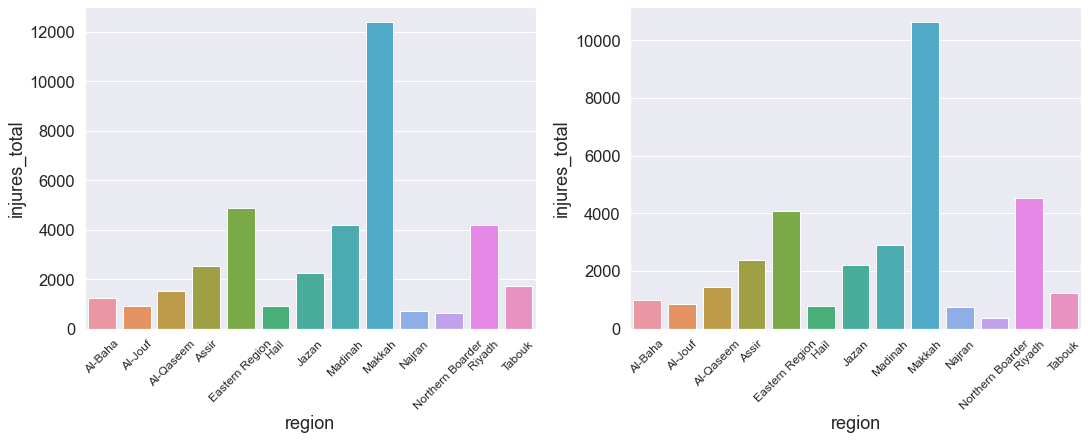

In [209]:
num = [col for col in ta_dl_df.columns if isinstance(ta_dl_df[col][0], np.int64)] # numerical columns
cat = [col for col in ta_dl_df.columns if isinstance(ta_dl_df[col][0], str )] # categorical columns 

fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout=True)

x1 = ta_dl_df[ta_dl_df[num[0]] == 2016][cat[0]].sort_values()
y1 = ta_dl_df[ta_dl_df[num[0]] == 2016][num[4]]

x2 = ta_dl_df[ta_dl_df[num[0]] == 2017][cat[0]].sort_values()
y2 = ta_dl_df[ta_dl_df[num[0]] == 2017][num[4]]

ax[0] = sns.barplot(x=x1, y=y1, data=ta_dl_df, ax=ax[0])
ax[1] = sns.barplot(x=x2, y=y2, data=ta_dl_df, ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,fontsize=12)
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=45,fontsize=12)

plt.show()

Injuries total percent dropped by 10% or less than that in all regions

Overall, we can say accidents, deaths and injuries total dropped in all regions except Makkah, so that accidents rates raised by 8% and seem that most of these accidents did not increase deaths and injuries total as we notced. Stilling driving licenses total raised year after year and this returns to populaton growth.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [423]:
ta_dl_df1.describe()

,year,driving_license_total,x,y,accidents_total,deaths_total,injures_total
count,325.000000,325.000000,325.000000,325.000000,26.000000,26.000000,26.000000
mean,2005.000000,28915.347692,23.810447,42.602789,38225.692308,635.384615,2743.038462
std,7.222222,47419.058819,4.197987,3.254196,46493.705035,549.783381,2922.641127
min,1993.000000,915.000000,17.207231,37.259858,1414.000000,112.000000,374.000000
25%,1999.000000,4846.000000,20.148406,41.263690,10276.250000,241.250000,923.000000
50%,2005.000000,10267.000000,23.288331,41.817119,16050.500000,415.500000,1618.500000
75%,2011.000000,25423.000000,27.400846,43.343000,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000


Answers: we have a gap in this data after we merged together because there are three columns did not find in `Driving Licesnes data` **accidents_total, deaths_total and injures_total** but we focused on the last two years 2016 and 2017 and describe them in visualizing section.

let us begin summrizing important statistics for some columns:
- driving_license_total

The average value was around 29,000 licenses yearly,  and standard deviation was around 47,500 higher than the average. It means number of licenses raised as clearly type in the last ten years and this logical, so that reached the maximum values around 49,600 licenses yearly in 2017. One more thing, there was a left skewness and this appear when we look the high difference between minimum, maximum and median values, the median was near of minimumn not be in the middle value. 

- accidents_total

the number of values were 26 of 325 observations. These values were limited for 2016 and 2017, the average value was 38,200 accidents yearly and standard deviation was around 46,500 accidetns haigher thatn the average. It deos not meane a number of accidents total were raisied from 2016 to 2017 because we made sure that before the accidents total dropped except Makkah may be that a reason but one more thing I would menstion about the value of standard deviation and why was it higher than mean? I think there was a high variation in accidents total from region to region so that it gave us high standard deviation as well as there was left skewneess.

- deaths_total and injuries_total

overall, there was a left skewness however did not large wherease percent of deaths average total to accidents average total was around 2% while was higher in injuries average total around 7%  

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: 

I think no, because some columns had skewness and others not so that we assume not normally distribution.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: 

As I mentioned before the skeness effict on the distribution of data so, I odd the data might be normally distribution.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer: 

First of full, I think we should focus on three regions Makkah , Riyadh and Eastern Region because they have the most percent of population so we need to add more rules and policies to limit of accidents. Then we should raise the awearance level between community specially Teenagers. We can minimize used cars by create new transportation such as metro and busses to limit accidents.

Finally, I suggest adding more features 'columns' to get more inshgts such as age of persons who injuires and reasons of accidents such as high speed, used mobile or signal cutting.
